In [23]:
import os
import itertools
import glob
import datetime

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker
import matplotlib.pyplot as plt


pal = sns.color_palette(['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', '#BBBBBB'])
sns.set_palette(pal)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['figure.figsize'] = (4.5,2)
mpl.rcParams['figure.dpi'] = 100

In [24]:
start_date = '2022-03-03'
end_date = '2022-04-02'

In [25]:
start_date = datetime.datetime.strptime(start_date, '%Y-%m-%d')
end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d')

In [26]:
# read all jl files
files = glob.glob('./uclouvain-data/speed-test/*.jl')
dfs = []
for f in files:
    df = pd.read_json(f, lines=True)
    df.dropna(inplace=True)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["ping_jitter"] = df["ping"].apply(lambda x: x["jitter"])
    df["ping_latency"] = df["ping"].apply(lambda x: x["latency"])
    df["download_bandwidth"] = df["download"].apply(lambda x: x["bandwidth"])
    df["upload_bandwidth"] = df["upload"].apply(lambda x: x["bandwidth"])
    df["download_bytes"] = df["download"].apply(lambda x: x["bytes"])
    df["upload_bytes"] = df["upload"].apply(lambda x: x["bytes"])
    df["download_elapsed"] = df["download"].apply(lambda x: x["elapsed"])
    df["upload_elapsed"] = df["upload"].apply(lambda x: x["elapsed"])
    df["interface_internalIp"] = df["interface"].apply(lambda x: x["internalIp"])
    df["interface_name"] = df["interface"].apply(lambda x: x["name"])
    df["interface_macAddr"] = df["interface"].apply(lambda x: x["macAddr"])
    df["interface_isVpn"] = df["interface"].apply(lambda x: x["isVpn"])
    df["interface_externalIp"] = df["interface"].apply(lambda x: x["externalIp"])
    df["server_id"] = df["server"].apply(lambda x: x["id"])
    df["server_name"] = df["server"].apply(lambda x: x["name"])
    df["server_location"] = df["server"].apply(lambda x: x["location"])
    df["server_country"] = df["server"].apply(lambda x: x["country"])
    df["server_host"] = df["server"].apply(lambda x: x["host"])
    df["server_port"] = df["server"].apply(lambda x: x["port"])
    df["server_ip"] = df["server"].apply(lambda x: x["ip"])
    df = df.drop(columns=['ping', 'download', 'upload', 'interface', 'server', 'result'])
    dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df.head()

,type,timestamp,packetLoss,isp,ping_jitter,ping_latency,download_bandwidth,upload_bandwidth,download_bytes,upload_bytes,...,interface_isVpn,interface_externalIp,server_id,server_name,server_location,server_country,server_host,server_port,server_ip,error
0,result,2022-01-06 00:26:08+00:00,0.000000,Starlink,1.346,32.928,18459258,5262958,234069200,51111504,...,False,188.95.144.164,45320,1Ago,Sint-Niklaas,Belgium,speedtest.1ago.be,8080,185.21.134.1,NaN
1,result,2022-01-06 00:43:52+00:00,0.000000,Starlink,4.194,39.848,15327933,1589287,179699344,22041456,...,False,188.95.144.164,12627,Proximus,Brussels,Belgium,speedtest101.proximus.be,8080,91.183.245.149,NaN
2,result,2022-01-06 01:26:14+00:00,0.333333,Starlink,2.711,42.614,18890757,855731,201894640,12583120,...,False,188.95.144.164,2848,Cu.be Solutions,Diegem,Belgium,speedtest.cu.be,8080,194.50.97.41,NaN
3,result,2022-01-06 02:02:39+00:00,0.000000,Starlink,2.013,47.958,32244094,2058200,423198520,26983720,...,False,188.95.144.164,30594,Orange Belgium,Evere,Belgium,speedtest01.orange.be,8080,212.224.131.122,NaN
4,result,2022-01-06 02:26:07+00:00,0.000000,Starlink,0.152,31.851,9766208,2684574,135358128,26771760,...,False,188.95.144.164,26887,Arxus NV,Brussels,Belgium,ookla.arxus.eu,8080,94.143.190.30,NaN


In [27]:
df.to_csv('uclouvain-data/speed-test.csv', index=False)

<AxesSubplot: xlabel='timestamp', ylabel='ping_latency'>

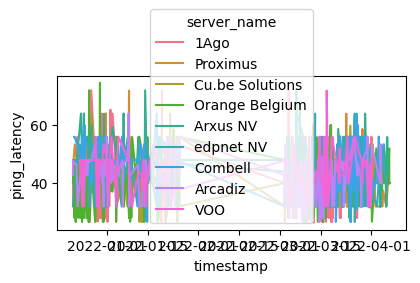

In [28]:
sns.lineplot(x="timestamp", y="ping_latency", hue="server_name", data=df)

Text(0.5, 0, 'Time')

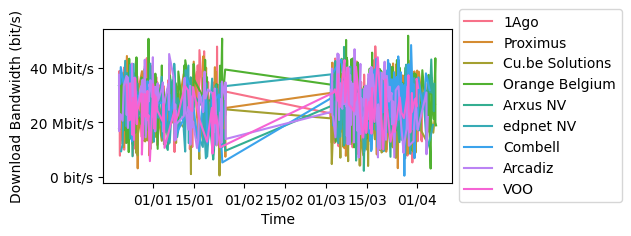

In [29]:
g = sns.lineplot(x="timestamp", y="download_bandwidth", hue="server_name", data=df)
g.legend_.remove()
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.yaxis.set_major_formatter(matplotlib.ticker.EngFormatter(unit='bit/s'))
g.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%d/%m'))
g.set_ylabel('Download Bandwidth (bit/s)')
g.set_xlabel('Time')

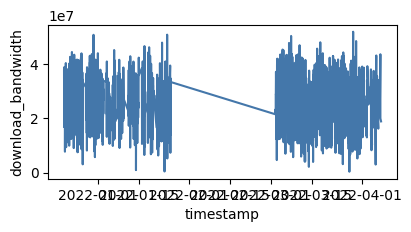

In [30]:
g = sns.lineplot(x="timestamp", y="download_bandwidth", data=df)

In [31]:
# now pings!
# read all jl files
files = glob.glob('./uclouvain-data/ping/ping*.jl')
dfs = []
for f in files:
    df_ping = pd.read_json(f, lines=True)
    df_ping.dropna(inplace=True)
    df_ping["timestamp"] = pd.to_datetime(df_ping["timestamp"])
    dfs.append(df_ping)
df_ping = pd.concat(dfs, ignore_index=True)
df_ping.to_csv('uclouvain-data/ping.csv', index=False)
df_ping.head()

,type,timestamp,bytes,response_ip,icmp_seq,ttl,time_ms,duplicate
0,reply,2022-03-26 00:00:01.809998080,64,193.0.19.59,1,55,69.9,False
1,reply,2022-03-26 00:00:02.785553920,64,193.0.19.59,2,55,44.5,False
2,reply,2022-03-26 00:00:03.801693952,64,193.0.19.59,3,55,59.1,False
3,reply,2022-03-26 00:00:28.224142080,64,193.0.19.60,1,56,72.0,False
4,reply,2022-03-26 00:00:29.215565824,64,193.0.19.60,2,56,62.4,False


In [32]:
len(df_ping)

2495793